# **IRIS FLOWER CLASSIFICATION**

**1. Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris


**2. Loading the Iris Dataset**

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: Species (setosa, versicolor, virginica)

# Convert to a DataFrame for easier exploration
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = y
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows of the dataset
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


**3. Data Exploration**

In [3]:
# Summary statistics
print(iris_df.describe())

# Check for missing values
print(iris_df.isnull().sum())

# Class distribution
print(iris_df['species'].value_counts())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
species
setosa        50
versicolor    50
virginica 

**4. Data Visualization**

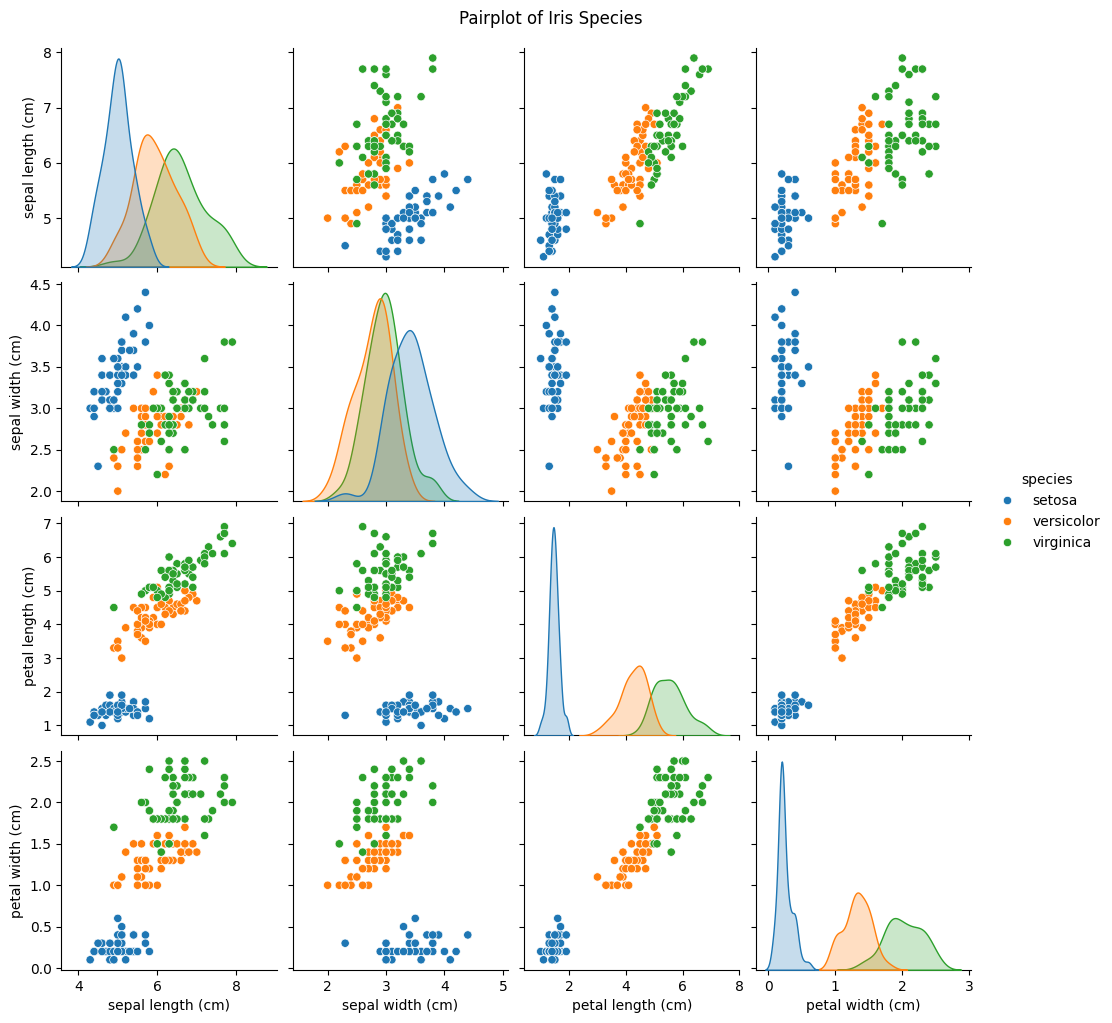

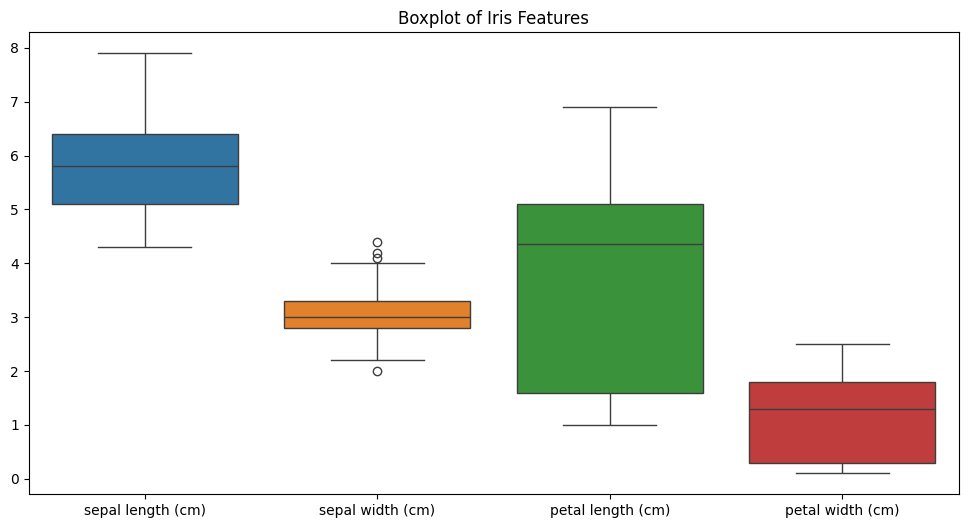

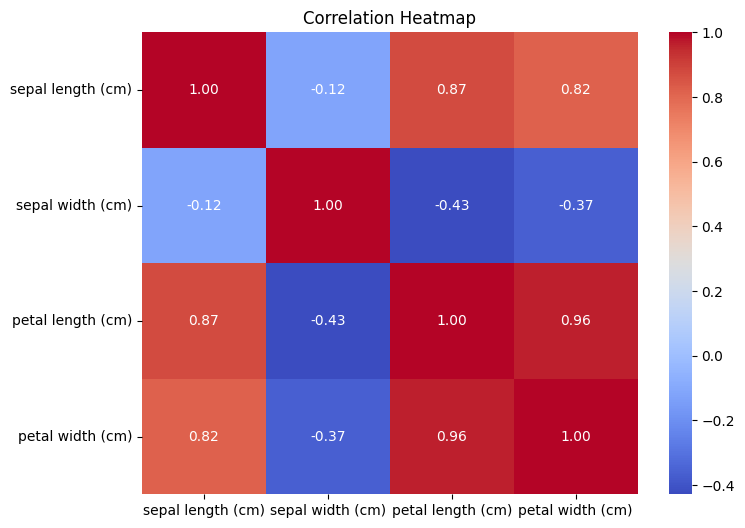

In [4]:
# Pairplot to visualize the relationship between features
sns.pairplot(iris_df, hue='species')
plt.suptitle('Pairplot of Iris Species', y=1.02)
plt.show()

# Boxplot to visualize the distribution of each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris_df.drop(columns='species'))
plt.title('Boxplot of Iris Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.drop(columns='species').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


**5. Data Preprocessing**

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**6. Model Training**

In [6]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**7. Model Evaluation**

In [7]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

Accuracy: 88.89%


**8. Visualizing Model Performance**

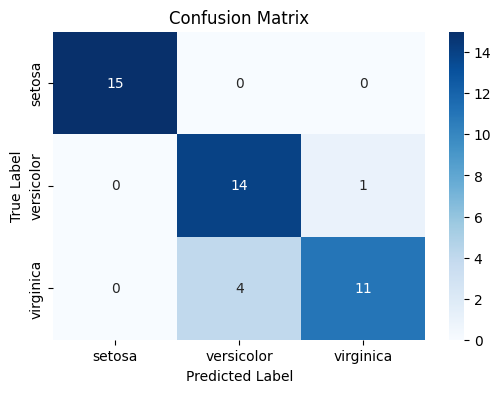

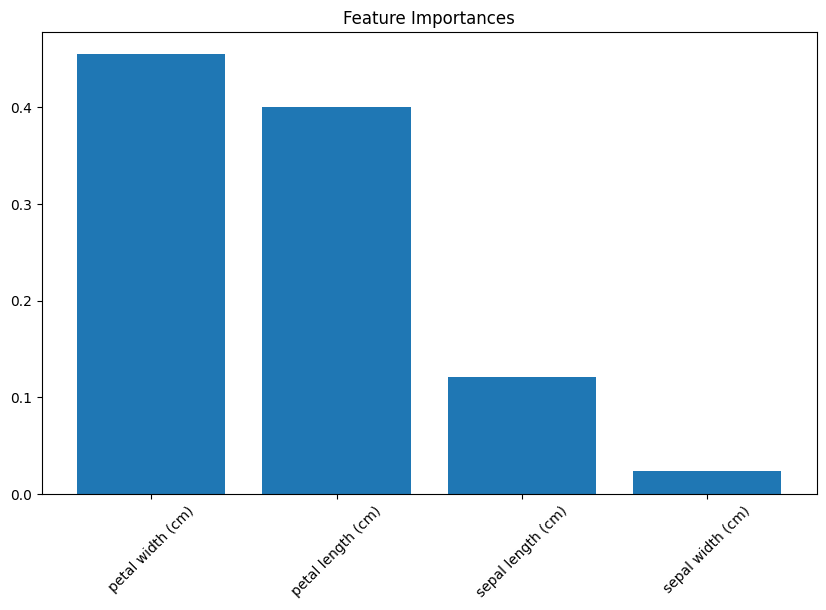

In [8]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = iris.feature_names

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.show()
